In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  #to standardized the data to a common range between 0 & 1
from sklearn.model_selection import train_test_split #to split our data into training and test data
from sklearn import svm #supervised learning algorithm
from sklearn.metrics import accuracy_score #it calculates the accuracy of a classification model

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

Data Collection 

In [4]:
#loading the dataset to pandas dataframe

data = pd.read_csv('diabetes.csv')

In [5]:
#first five rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#number of rows and columns
data.shape

(768, 9)

In [7]:
#checking for missing values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


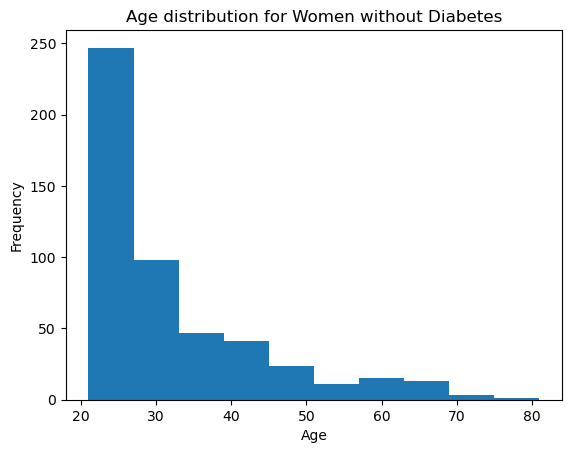

In [9]:
plt.hist(data[data['Outcome']==0]['Age'], bins = 10)
plt.title('Age distribution for Women without Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

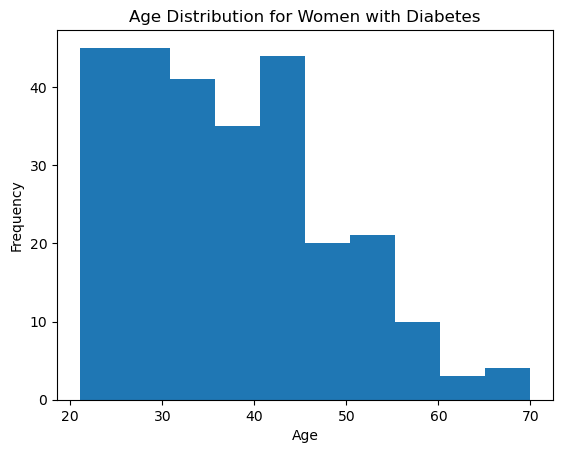

In [10]:
plt.hist(data[data['Outcome']==1]['Age'], bins = 10)
plt.title('Age Distribution for Women with Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [81]:
#Correlation
correlation = data.iloc[:,0:8].corr()

correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


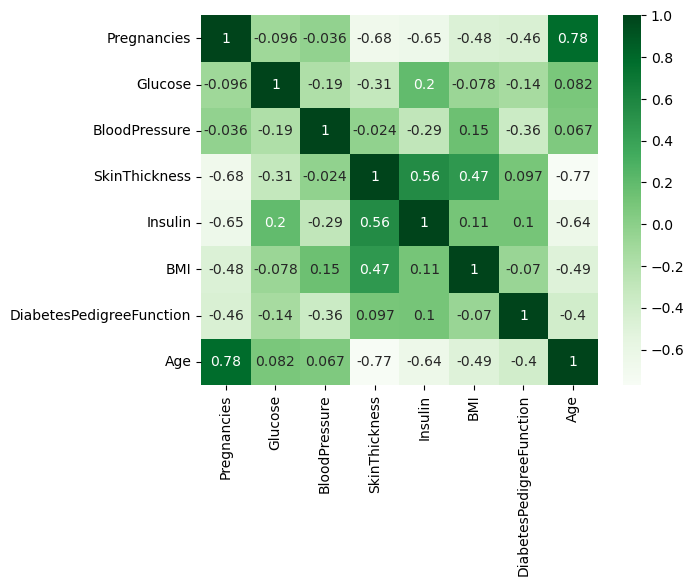

In [85]:
 #heatmap showing the correlation between two variables
sns.heatmap(correlation.corr(numeric_only=True).iloc[:,0:8], annot=True, cmap='Greens');

In [13]:
#statistics of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#number of diabetes and non-diabetes patients
#  0 = Non-diabetic patients
#  1 = Diabetic patients
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
#Mean value of the dataset by diabetic and non diabetic patients groupby 'Outcome'
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
#Seperating features from label

x = data.drop(columns = 'Outcome', axis = 1)
y = data['Outcome']

In [17]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [19]:
#Data standardization; to convert the values to a common range between 0 & 1 for our ML prediction we use the function 
scaler = StandardScaler()


In [20]:
#Fitting and transforming the 'x' data into the scaler to be in a common range
standardized_data = scaler.fit_transform(x)

In [21]:
#Printing the 'standardized_data' data
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
x = standardized_data
y = data['Outcome']

Spliting the Data into Training and Test Data.


In [24]:

# test_size 0.2 = 20% data,  
#y = stratify it ensures that the distribution of y is maintained in both y_train and x_train
#random_state = the same data split is generated everytime I run the code

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

In [25]:
#Checking the shape of the data
#x_train = 80%
#x_test = 20%

print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [26]:
#Training the model, using our support vector machine linear classifier
#I'm using linear because the data can be classified into two clases 'diabetes and non-diabetes'

classifier = svm.SVC(kernel = 'linear')

Algorithm

In [28]:
#Fitting our training data into the classifier
# x_training data and y_train is the label

classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [30]:
#Evaluating the model to know the accuracy the training data

x_train_prediction = classifier.predict(x_train) 

training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [31]:
#Accuracy score of the train data

print('Accuracy score of the training data is:', training_data_accuracy)

Accuracy score of the training data is: 0.7866449511400652


In [32]:
#Evaluating the model to know the accuracy the test data

x_test_prediction = classifier.predict(x_test)

test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [33]:
#Accuracy score of the Test Data

print('Accuracy score of the test data is:', test_data_accuracy)

Accuracy score of the test data is: 0.7727272727272727


Predictive System

In [35]:
#Making a predictive system
input_data = (10,168,74,0,0,38,0.537,34)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardizing the input_data
std_data = scaler.transform(reshape_input_data)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction==0:
    print('The patient is non-diabetic')
else:
    print('The patient is diabetic')

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]
[1]
The patient is diabetic


In [36]:
#Making a predictive system for Non-Diabetic
input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardizing the input_data
std_data = scaler.transform(reshape_input_data)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction==[0]:
    print('The patient is non-diabetic')
else:
    print('The patient is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The patient is non-diabetic
